# Adventure Motorcycle Segment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('adv-moto-data.csv')
# df

In [13]:
df.groupby('Category')['Engine (cc)'].mean().astype(int)

Category
Heavyweight     1076
Lightweight      457
Middleweight     779
Name: Engine (cc), dtype: int64

## Let's visualize our data

### Plotting engine size

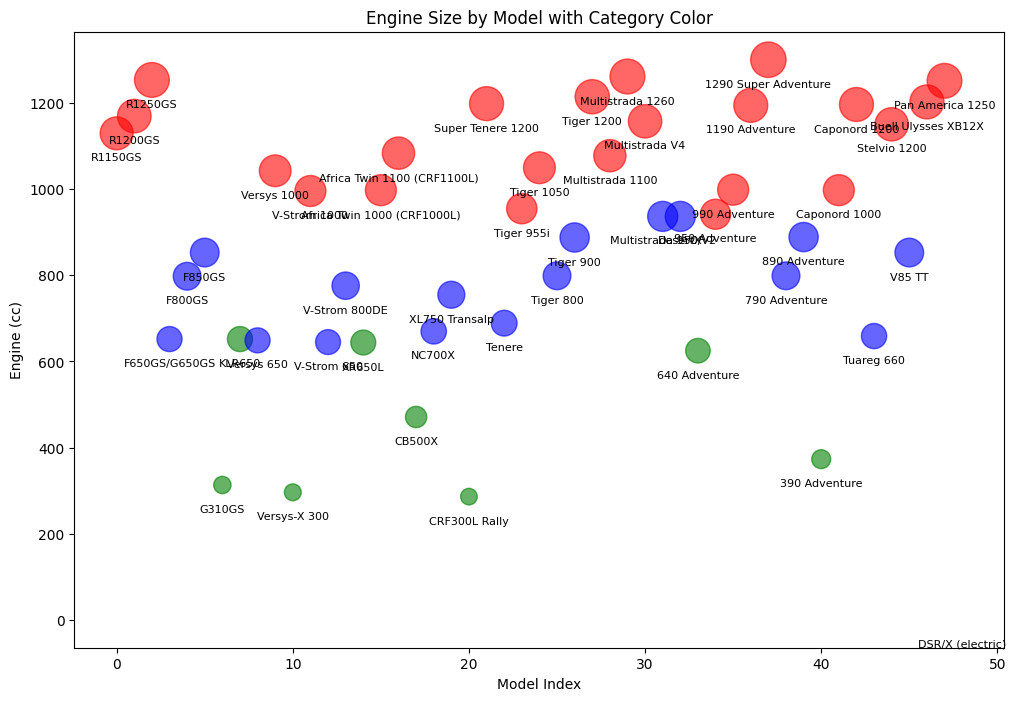

In [16]:
# Map categories to colors
colors = {'Heavyweight': 'red', 'Middleweight': 'blue', 'Lightweight': 'green'}
df['Color'] = df['Category'].map(colors)

plt.figure(figsize=(12, 8))

# Use df.index for the x-axis and 'Engine (cc)' for the y-axis.
# The marker size is proportional to engine size, scaled down by a factor.
scaling_factor = 0.5
plt.scatter(
    df.index,
    df['Engine (cc)'],
    s=df['Engine (cc)'] * scaling_factor,
    color=df['Color'],
    alpha=0.6
)

# Annotate each point with the model name, offset slightly above the marker
for i, row in df.iterrows():
    plt.annotate(
        row['Model'],
        (i, row['Engine (cc)']),
        textcoords="offset points",
        xytext=(0, -14),  # Offset label by 10 points below the marker
        ha='center',
        va='top',  # Align text so that its top is at the offset position
        fontsize=8
    )

plt.xlabel('Model Index')
plt.ylabel('Engine (cc)')
plt.title('Engine Size by Model with Category Color')
plt.show()

## Visualizing Engine Size by Category

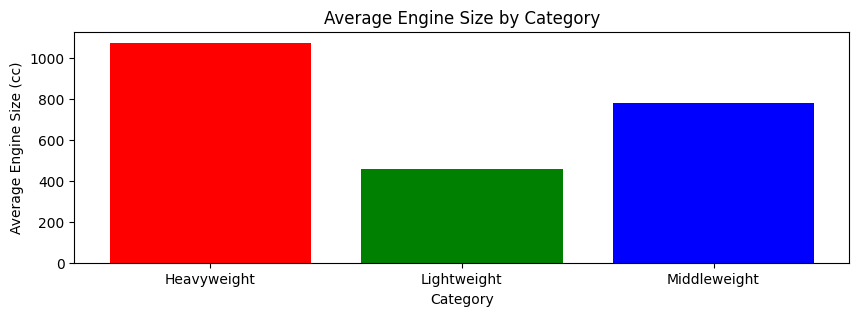

In [19]:
# Compute the average engine size by category
avg_engine_size = df.groupby('Category')['Engine (cc)'].mean()

# Define colors for each category
colors = {'Heavyweight': 'red', 'Middleweight': 'blue', 'Lightweight': 'green'}

# Create the bar plot
plt.figure(figsize=(10, 3))
plt.bar(avg_engine_size.index, avg_engine_size.values,
        color=[colors[cat] for cat in avg_engine_size.index])
plt.xlabel('Category')
plt.ylabel('Average Engine Size (cc)')
plt.title('Average Engine Size by Category')
plt.show()